PRIMEIRA QUESTÃO
1) Modele os seguintes sólidos/objetos 
Na construção dos sólidos, crie uma função que retorne o sólido ( ou seja, retorne a matriz de vértices e arestas). Perceba que cada objeto é descrito indiretamente (no caso do cone, por exemplo, pelo raio e pela altura). A origem do objeto pode ser definida de forma fixa dentro da função ou, opcionalmente, pode ser passada também como parâmetro da função.

In [58]:
!pip install numpy matplotlib trimesh

In [59]:
import sys
import numpy as np
sys.path.append('./modelos')  # adiciona a pasta modelos ao path

from utils import plotar_malha_3d

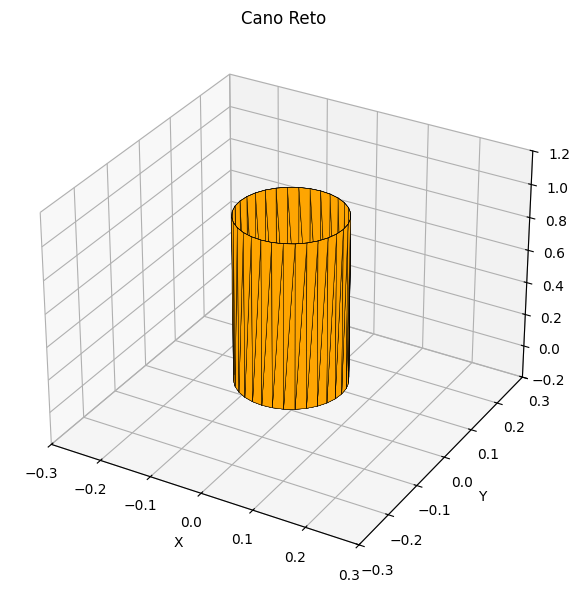

In [60]:
from objeto import Objeto3D

cano_reto = Objeto3D()
cano_reto.modelar_cano_reto(raio_interno=0.1, raio_externo=0.1, altura=1.0, resolucao=32)

plotar_malha_3d(cano_reto.vertices, cano_reto.faces, titulo="Cano Reto")

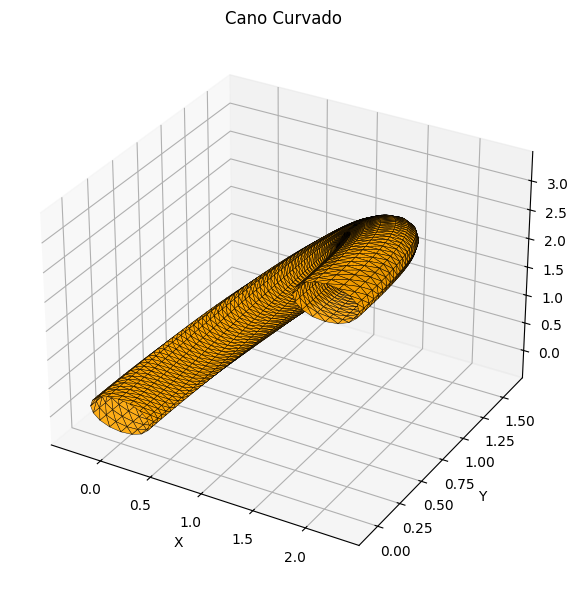

In [61]:
cano_curvado = Objeto3D()

cano_curvado.gerar_cano_curvado(
    P0 = np.array([0, 0, 0]),
    P1 = np.array([2, 0, 3]),
    T0 = np.array([0, 5, 0]), 
    T1 = np.array([0, -5, 0]),
    raio=0.3,
    resolucao_circular=16,
    resolucao_curva=100)

plotar_malha_3d(cano_curvado.vertices, cano_curvado.faces, titulo="Cano Curvado")

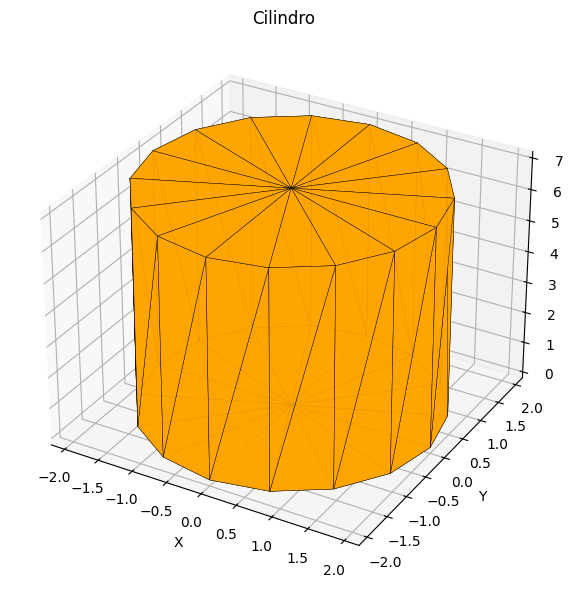

In [67]:
cilindro = Objeto3D()
cilindro.modelar_cilindro(raio=2.0, altura=7.0, resolucao=16)
plotar_malha_3d(cilindro.vertices, cilindro.faces, titulo="Cilindro")

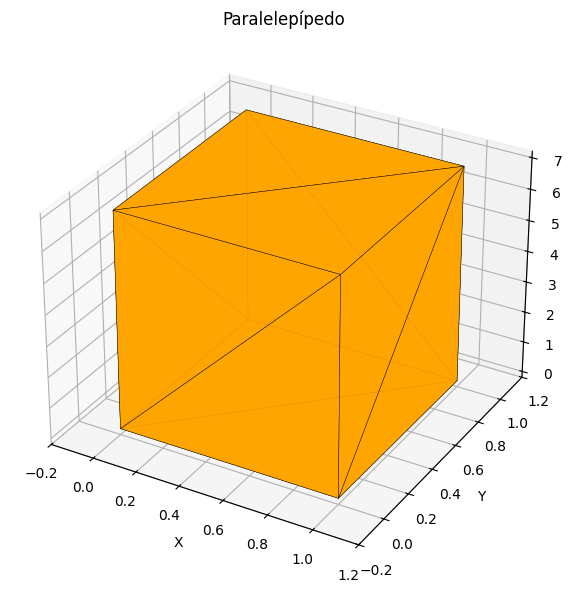

In [63]:
paralelepipedo = Objeto3D()
paralelepipedo.modelar_paralelepipedo(base=1, altura=7, comprimento=1)
plotar_malha_3d(paralelepipedo.vertices, paralelepipedo.faces, titulo="Paralelepípedo")

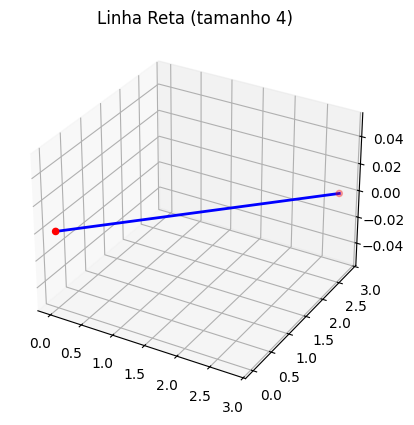

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

reta = Objeto3D()
reta.modelar_linha(tamanho=4, direcao=np.array([1, 1, 0]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = [v[0] for v in reta.vertices]
y_vals = [v[1] for v in reta.vertices]
z_vals = [v[2] for v in reta.vertices]

ax.plot(x_vals, y_vals, z_vals, color='blue', linewidth=2)
ax.scatter(x_vals, y_vals, z_vals, color='red')  # marca os pontos
ax.set_title("Linha Reta (tamanho 4)")
plt.show()

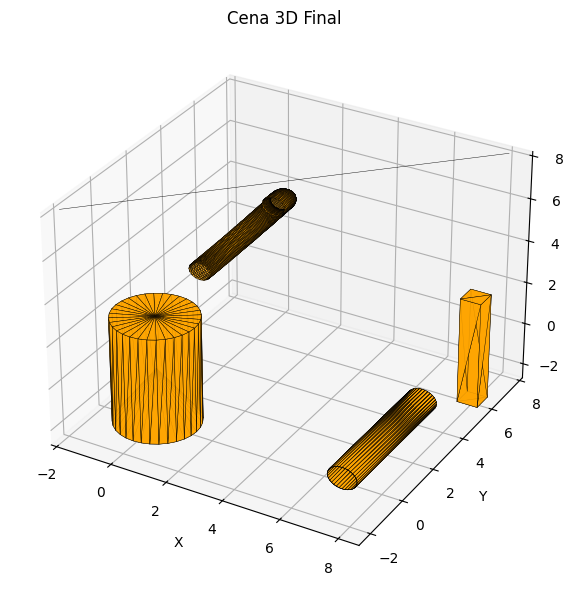

In [65]:
from utils import aplicar_escala, aplicar_translacao, aplicar_rotacao, normalizar_solido, plotar_malha_3d, faces_para_indices

# 1. Normalizar os sólidos
#C_R_vertices_norm = normalizar_solido(C_R_vertices)
cano_reto.vertices = normalizar_solido(cano_reto.vertices)

#C_C_vertices_norm = normalizar_solido(C_C_vertices)
cano_curvado.vertices = normalizar_solido(cano_curvado.vertices)

#C_L_vertices_norm = normalizar_solido(C_L_vertices)
cilindro.vertices = normalizar_solido(cilindro.vertices)

#P_R_vertices_norm = normalizar_solido(P_R_vertices)
paralelepipedo.vertices = normalizar_solido(paralelepipedo.vertices)

#L_R_vertices_norm = normalizar_solido(L_R_vertices)
reta.vertices = normalizar_solido(reta.vertices)


cano_reto.aplicar_escala(0.5)
cano_reto.aplicar_translacao([8, 0, 0])

cano_curvado.aplicar_escala(0.5)
cano_curvado.aplicar_translacao([0, 6, 3])

cilindro.aplicar_escala(0.5)
cilindro.aplicar_translacao([0, 0, 0])

paralelepipedo.aplicar_escala(0.5)
paralelepipedo.aplicar_translacao([8, 6, 0])

reta.aplicar_translacao([3, 3, 8])


cano_reto.aplicar_rotacao('x', 90)

# 4. Converter faces de vértices para índices
#C_R_faces = faces_para_indices(C_R_faces, C_R_vertices_final)
#C_C_faces = faces_para_indices(C_C_faces, C_C_vertices_final)
#C_L_faces = faces_para_indices(C_L_faces, C_L_vertices_final)
#P_R_faces = faces_para_indices(P_R_faces, P_R_vertices_final)
#L_R_faces = [[L_R_vertices[0]], [L_R_vertices[1]], [L_R_vertices[1]]]
cano_reto.atribuir_faces()
cano_curvado.atribuir_faces() 
cilindro.atribuir_faces()
paralelepipedo.atribuir_faces()
reta.atribuir_faces()

# 5. Combinar todos os vértices
vertices_total = (
    cano_reto.vertices +
    cano_curvado.vertices +
    cilindro.vertices +
    paralelepipedo.vertices +
    reta.vertices
)

# 6. Criar a face degenerada da linha
#offset_linha = len(vertices_total) - 2  # últimos dois vértices são da linha
#L_R_faces_adj = [[offset_linha, offset_linha + 1, offset_linha + 1]]

# 7. Calcular offsets para as demais faces
#offsets = [
#    0,
#    len(C_R_vertices_final),
#    len(C_R_vertices_final) + len(C_C_vertices_final),
#    len(C_R_vertices_final) + len(C_C_vertices_final) + len(C_L_vertices_final)
#]

# 8. Ajustar índices das faces
#C_R_faces_adj = C_R_faces
#C_C_faces_adj = [[v + offsets[0] for v in f] for f in C_C_faces]
#C_L_faces_adj = [[v + offsets[1] for v in f] for f in C_L_faces]
#P_R_faces_adj = [[v + offsets[2] for v in f] for f in P_R_faces]

# 9. Unir todas as faces
faces_total = (
    cano_reto.faces +
    cano_curvado.faces +
    cilindro.faces +
    paralelepipedo.faces +
    reta.faces
)

# 10. Plotar a cena completa
plotar_malha_3d(vertices_total, faces_total, titulo="Cena 3D Final")
